### Угадываем признак

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
 
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Посмотрим много ли в наших признаках пустых значений

In [4]:
data[ pd.isnull( data['height'] ) ].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [5]:
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [6]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [7]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Строим модель

In [10]:
data.sport.nunique()

27

In [11]:
data.sport.value_counts()

sport
athletics            2187
aquatics             1396
football              583
rowing                535
cycling               502
hockey                432
volleyball            382
shooting              380
judo                  377
sailing               372
wrestling             349
handball              349
canoe                 327
gymnastics            319
rugby sevens          296
basketball            284
weightlifting         258
fencing               245
equestrian            215
tennis                191
table tennis          168
badminton             164
archery               126
taekwondo             125
golf                  115
triathlon             109
modern pentathlon      72
Name: count, dtype: int64

In [12]:
data['nationality'].value_counts()

nationality
USA    552
BRA    466
GER    435
AUS    410
FRA    398
      ... 
SOL      1
LES      1
SUR      1
COD      1
BAN      1
Name: count, Length: 200, dtype: int64

In [13]:
data['nationality'].nunique()

200

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['sex'])
y = pd.Series(data = le.transform(data['sex']))
y.head(3)

0    1
1    0
2    1
dtype: int64

In [15]:
y.value_counts() # сильных перекосов по классам нет

1    5862
0    4996
Name: count, dtype: int64

In [16]:
features_columns = [c for c in data.columns if c not in ['sex', 'name', 'id', 'nationality']]
data['dob'] = data['dob'].str[-2:].astype(int)

In [17]:
data_short = data[features_columns]
X = pd.get_dummies(data_short)
X.head(3)

,dob,height,weight,gold,silver,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,69,1.72,64.0,0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,86,1.68,56.0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,92,1.98,79.0,0,0,1,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train, y_train)

c:\Users\cherniavskaia_m\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
predictions = model.predict_proba(X_test)

In [20]:
model.score(X_train, y_train)

0.8123416992862077

In [21]:
model.score(X_test, y_test)

0.8043278084714549

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [23]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [24]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [25]:
le.fit( data['sex'] )

LabelEncoder()

In [26]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [27]:
model = LogisticRegression()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:, 1], y_test):
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1

    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [31]:
precision = tp / (tp + fp)
precision

0.8040579710144927

In [32]:
recall = tp / (tp + fn)
recall

0.7779024116657319

In [33]:
(tp + tn) / (tp + fp + fn + tn)

0.7747084100675261

In [34]:
from sklearn.metrics import roc_curve

In [35]:
predictions = model.predict_proba(X_test)

In [36]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

In [37]:
from matplotlib import pyplot as plt

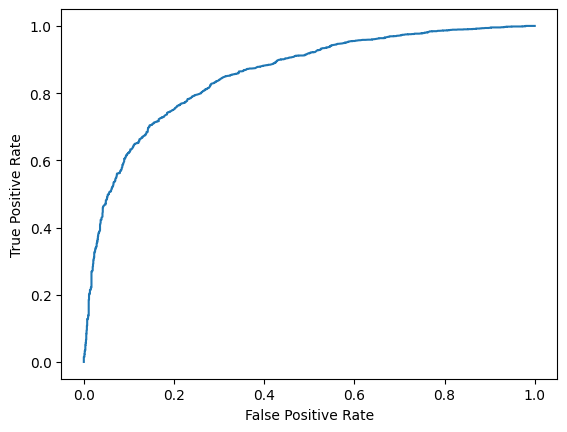

In [38]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score

In [40]:
roc_auc_score(y_test, predictions[:, 1])

np.float64(0.8552749603125565)

In [41]:
thresholds = np.arange(0, 1, 0.1)
#predictions определены выше
fprs = []
tprs = []
prs = []
res = []
pr_custom = []
for threshold in thresholds:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr2 = tp/(tp + fn)
    fpr2 = fp/(fp + tn)
    precision = tp/(tp + fp)
    recall = tpr2 #по определению
    fprs.append(fpr2)
    tprs.append(tpr2)
    prs.append(precision)
    res.append(recall)

Text(0, 0.5, 'Recall')

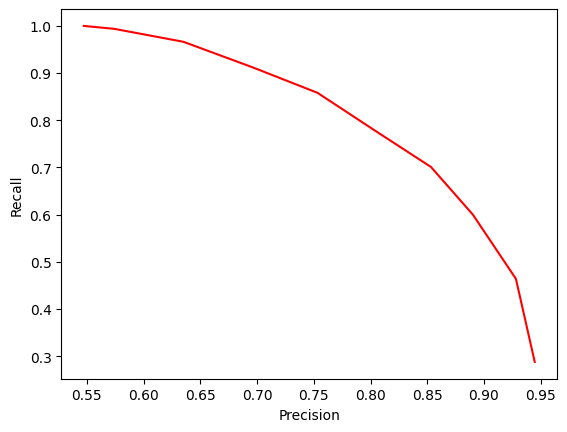

In [42]:
plt.plot(prs, res, color='red')
plt.xlabel('Precision')
plt.ylabel('Recall')

Text(0, 0.5, 'True Positive Rate')

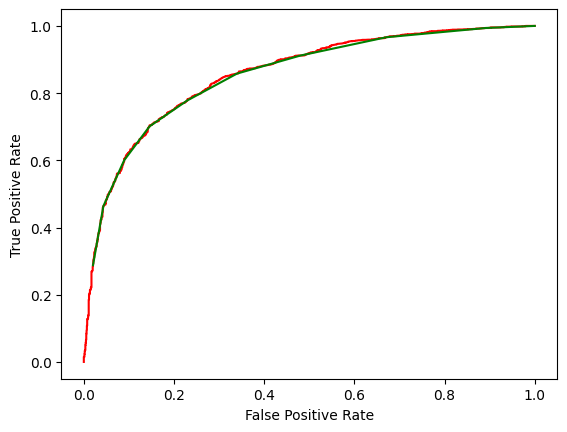

In [43]:
plt.plot(fpr, tpr, color="r")
plt.plot(fprs, tprs, color="g")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Я так поняла, что смысл был в том, чтобы понимать, что при увеличении tp, растет и fp. То есть мы должны все-таки понимать, что нам важнее и что приемлемее допустить ошибку первого рода или ошибку второго рода. Ну то есть если мы поднимем tn до единицы, то это вызовет и увеличение fn. И необходимо не добиться идеальности, а соблюсти баланс